In [1]:
import numpy as np
import os

# Imports nécessaires pour construire un modèle LeNet 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling

# Pour importer le datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Pour la compilation du modèle
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Pour visualiser les performances
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

print(tf.__version__)
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
tf.keras.backend.clear_session()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


# Chargement du dataset
dir_name = "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample"
img_size = (224, 224)  # Taille cible
batch_size = 128
class_names = sorted(os.listdir(dir_name))
nb_class = len(class_names)

train_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    dir_name,
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)

# Ajout d'optimisation : mise en cache et préchargement
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()

2025-03-15 23:00:30.698672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742076030.712929   37236 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742076030.717444   37236 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742076030.728411   37236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742076030.728427   37236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742076030.728428   37236 computation_placer.cc:177] computation placer alr

2.19.0
Num GPUs Available:  1
Found 6851 files belonging to 3 classes.
Using 5481 files for training.


I0000 00:00:1742076041.339897   37236 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 6851 files belonging to 3 classes.
Using 1370 files for validation.


## Entrainement du modèle

Epoch 1/40


E0000 00:00:1742076178.854569   37236 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/efficientnetb3_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1742076182.163922   37450 cuda_dnn.cc:529] Loaded cuDNN version 90800


43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 647ms/step - accuracy: 0.3070 - loss: 1.2381 - val_accuracy: 0.2051 - val_loss: 1.1996 - learning_rate: 1.0000e-05
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 542ms/step - accuracy: 0.3558 - loss: 1.1350 - val_accuracy: 0.3197 - val_loss: 1.1145 - learning_rate: 1.0000e-05
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 560ms/step - accuracy: 0.4407 - loss: 1.0646 - val_accuracy: 0.4701 - val_loss: 1.0597 - learning_rate: 1.0000e-05
Epoch 4/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 563ms/step - accuracy: 0.4764 - loss: 1.0403 - val_accuracy: 0.4774 - val_loss: 1.0246 - learning_rate: 1.0000e-05
Epoch 5/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 570ms/step - accuracy: 0.5259 - loss: 0.9962 - val_accuracy: 0.4847 - val_loss: 1.0032 - learning_rate: 1.0000e-05
Epoch 6/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 542ms/step - accuracy: 0.5191 - loss: 0.9871 - val_accuracy: 0.4934 - val_loss: 0.9886 - learning_rate: 1.0000e-05
Epoch 7/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 566ms/step - accuracy: 0.53

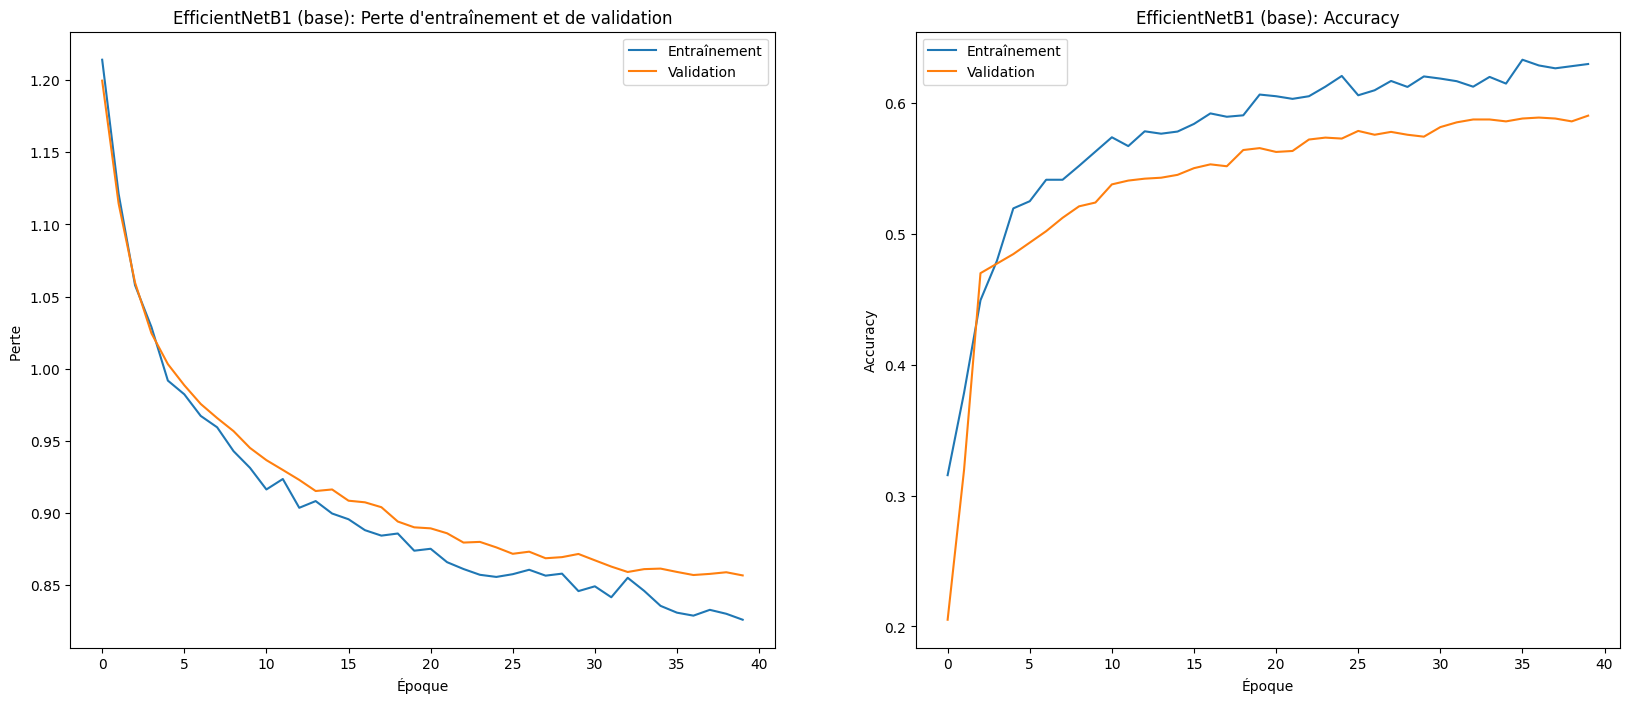

In [3]:
import tensorflow as tf 
# 1. Choisir un modèle préentraîné
base_model = tf.keras.applications.EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
#base_model.trainable = False  # Geler d'abord le modèle de base

# Dégeler les dernières couches du modèle de base
base_model.trainable = True

# Geler toutes les couches sauf les 20 dernières
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
# 2. Construire le modèle complet

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

model = tf.keras.Sequential([
    # Augmentation de données
    data_augmentation,

    # Prétraitement spécifique au modèle
    tf.keras.layers.Rescaling(1./127.5, offset=-1),  

    # Modèle de base
    base_model,

    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(nb_class, activation='softmax')
])

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3
)

model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5),                 
    metrics=['accuracy'])  

model_history = model.fit(train_ds,           
                           validation_data=val_ds,
                           epochs=40,
                           callbacks=[lr_reducer])  

# Analyse de l'entainement
print("Analyse entraintement")
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Précision de validation finale: {val_accuracy:.4f}")
display_results(model_history, "EfficientNet (base)")

# Analyse de la performance
print("Analyse performance")

## Analyse de la performance par classe

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Générer des prédictions sur l'ensemble de validation
# Prévoir les classes pour tous les échantillons de validation
predictions = []
labels = []

# Récupérer toutes les étiquettes et prédictions
for images, true_labels in val_ds:
    pred = model.predict(images)
    pred_classes = np.argmax(pred, axis=1)
    
    predictions.extend(pred_classes)
    labels.extend(true_labels.numpy())

# Convertir en arrays numpy
predictions = np.array(predictions)
labels = np.array(labels)

# 2. Créer et afficher la matrice de confusion
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()